___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [73]:
df = pd.read_csv("store_sharing.csv")

df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [74]:
type(df['timestamp'][0])

# timestamp feature'unun string tipinde olduğunu gördüm. İlerde bunu datetime tipine çevirmem gerekecek

str

### 3.Check missing values and if there are any dublicate rows or not.

In [75]:
# düşürmek için drop_duplicates, veriye bakmak için duplicated kullanıyoruz. Datasetimde dublikasyon var mı bakalım.

df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17409    False
17410    False
17411    False
17412    False
17413    False
Length: 17414, dtype: bool

In [76]:
# aynı satır birden fazla var mı?

df.duplicated().value_counts()

# tüm satırlar False döndürdü. demek ki duplicate yok

False    17414
dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [78]:
df.isnull().sum() # elimdeki verilerde hiç boş veri olmadığını gördüm. dolayısıla dropna ile bunları düşürmeme gerek yok

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

In [79]:
df.season.value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

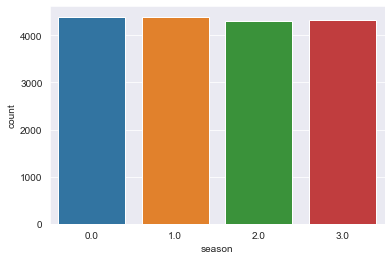

In [80]:
# season

sns.countplot("season", data=df);
# bunlar seoson'lara göre kayıt sayısını gösteriyor.

In [81]:
df.is_holiday.value_counts()

0.0    17030
1.0      384
Name: is_holiday, dtype: int64

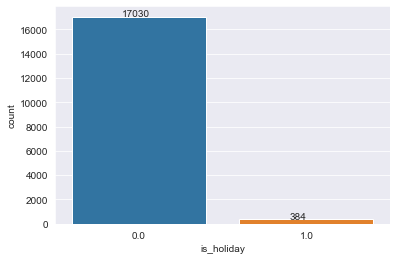

In [82]:
# is_holiday
# bunlar tatil günleri olup olmaması durumlarına göre kayıt sayısını gösteriyor.

ax = sns.countplot("is_holiday", data=df)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.3, p.get_height()+20));

# annotate kullanarak değerleri barların üzerine yazdıralım.

In [83]:
df.is_weekend.value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

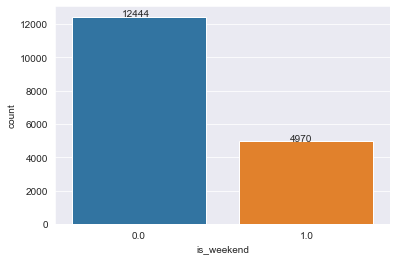

In [84]:
# is_weekend
# hafta sonu olup olmama durumuna göre kayıt sayısını gösteriyor.
ax = sns.countplot("is_weekend", data=df);

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.3, p.get_height()+20));

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog

In [85]:
df.weather_code.value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

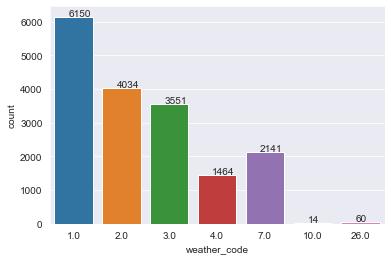

In [86]:
# weather_code
ax = sns.countplot("weather_code", data=df);

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.3, p.get_height()+20));

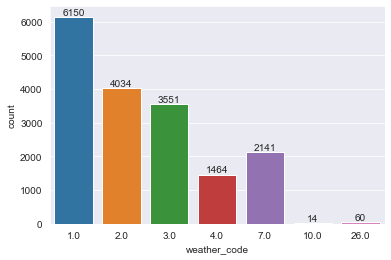

In [87]:
sns.countplot(data = df, x = "weather_code");

code = df.weather_code.value_counts().sort_index()
for index, value in enumerate(code):
    plt.text(index, value, str(value), ha="center", va="bottom")

### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [89]:
df.timestamp = pd.to_datetime(df.timestamp)
# timestamp kolonunun kendi içinde dolaşacak ve her birini datetime'a çevirecek. (datetime'a çevirerek yine kendine atadık.)

df.set_index("timestamp", inplace=True) # timestamp sütununu index yaptım.

df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [90]:
df["year"] = df.index.year # index'in year kısımlarını alıp year isminde bir sütun oluşturdum.

df["month"] = df.index.month
df["day_of_month"] = df.index.day
df["day_of_week"] = df.index.day_of_week
df["hour"] = df.index.hour


In [91]:
df["year-month"] = df.index.strftime("%Y-%m") # index'in year ve month kısımlarını beraber alıp yeni sütun oluşturduk.


In [92]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour,year-month
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,6,0,2015-01
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,6,1,2015-01
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,2,2015-01
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,3,2015-01
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,6,4,2015-01


### 7.Visualize the correlation with a heatmap

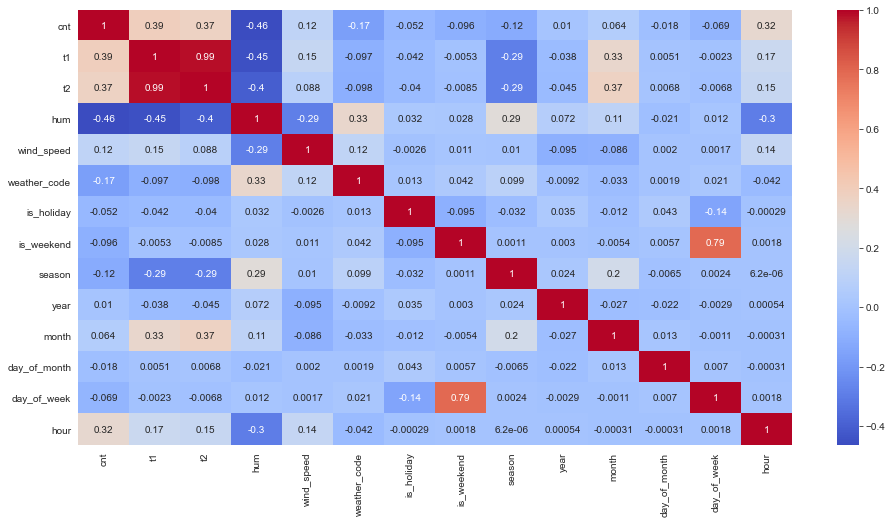

In [93]:
# for all variables 
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True);

In [94]:
df.corr()[["cnt"]]

,cnt
cnt,1.000000
t1,0.388798
t2,0.369035
hum,-0.462901
wind_speed,0.116295
weather_code,-0.166633
is_holiday,-0.051698
is_weekend,-0.096499
season,-0.116180
year,0.010046


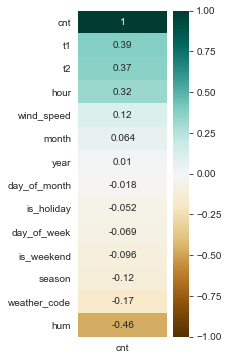

In [95]:
# for the target variable
plt.figure(figsize=(2,6))
sns.heatmap(df.corr()[["cnt"]].sort_values(by="cnt", ascending=False), annot=True, cmap="BrBG", vmin=-1);

# corr değerlerini küçükten büyüğe sıraladık

### 8. Visualize the correlation of the target variable and the other features with barplot

In [96]:
df.corr()[["cnt"]].sort_values(by="cnt", ascending=True)

,cnt
hum,-0.462901
weather_code,-0.166633
season,-0.116180
is_weekend,-0.096499
day_of_week,-0.068688
is_holiday,-0.051698
day_of_month,-0.017887
year,0.010046
month,0.063757
wind_speed,0.116295


<Figure size 720x432 with 0 Axes>

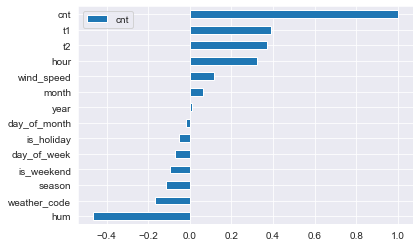

In [97]:
#with pandas
plt.figure(figsize=(10,6))
df.corr()[["cnt"]].sort_values(by="cnt", ascending=True).plot.barh();

### 9.Plot bike shares over time use lineplot

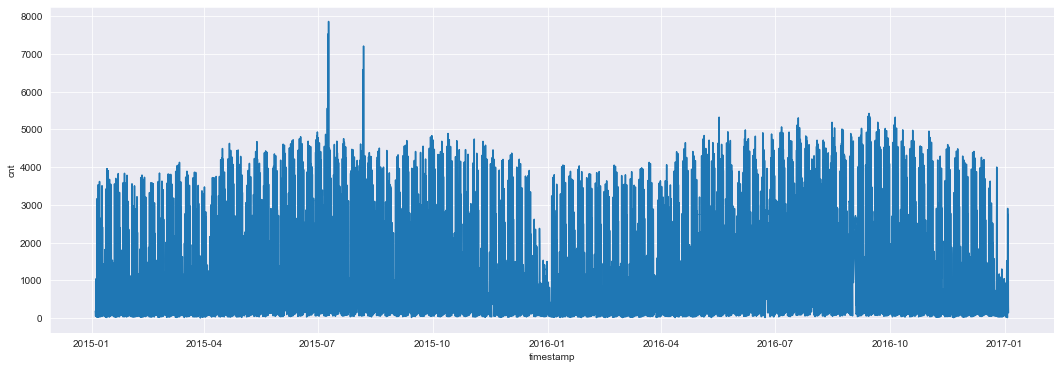

In [98]:
plt.figure(figsize=(18,6))
sns.lineplot(x=df.index, y="cnt", data=df);

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [99]:
df.groupby("year-month").cnt.sum() # önce aylara göre cnt sayılarının toplamını göreyim

year-month
2015-01     546639
2015-02     543594
2015-03     695934
2015-04     831582
2015-05     895413
2015-06    1033252
2015-07    1120687
2015-08    1033951
2015-09     892478
2015-10     865046
2015-11     677332
2015-12     602838
2016-01     582518
2016-02     592910
2016-03     656527
2016-04     768845
2016-05    1001935
2016-06     933878
2016-07    1165527
2016-08    1137314
2016-09     998619
2016-10     935706
2016-11     703859
2016-12     651908
2017-01      37680
Name: cnt, dtype: int64

In [100]:
df_sum = pd.DataFrame(df.groupby("year-month").cnt.sum()) # yukardaki bilgilerden oluışan yeni bir df_sum dataframe oluşturdum.

df_sum

,cnt
year-month,
2015-01,546639
2015-02,543594
2015-03,695934
2015-04,831582
2015-05,895413
2015-06,1033252
2015-07,1120687
2015-08,1033951
2015-09,892478


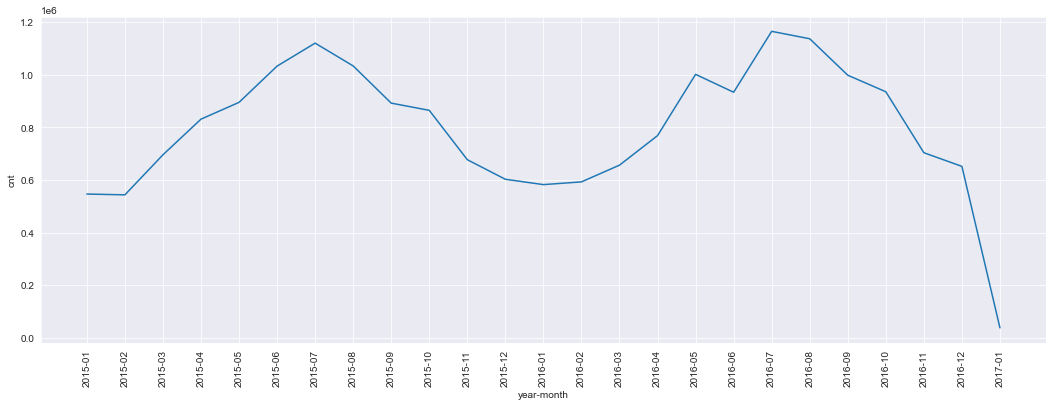

In [101]:
# with lineplot
plt.figure(figsize=(18,6))
sns.lineplot(x="year-month", y="cnt", data=df_sum)
plt.xticks(rotation=90);

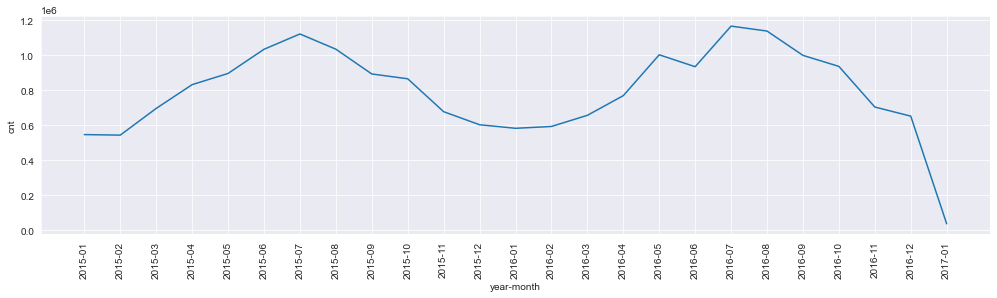

In [102]:
# alternative solutions
plt.figure(figsize=(17,4))
sns.lineplot(data = df, x = "year-month", y = "cnt", ci = None, estimator = sum)
plt.xticks(rotation = 90)
plt.show()

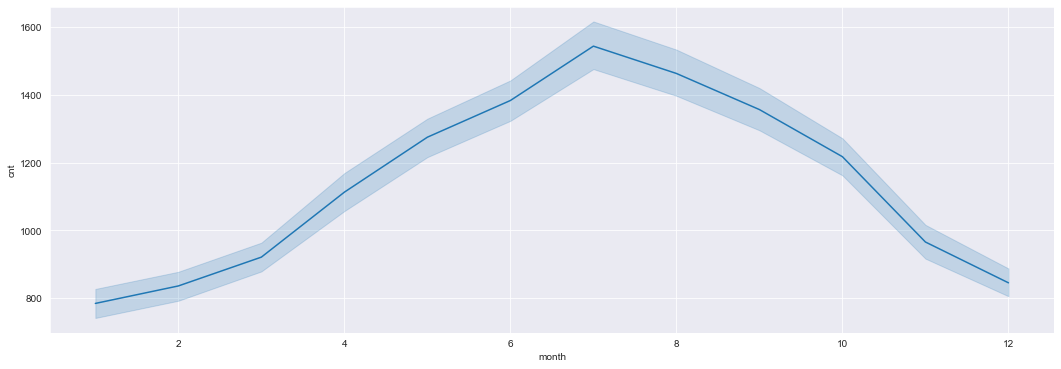

In [103]:
# with lineplot
plt.figure(figsize=(18,6))
sns.lineplot(x="month", y="cnt", data=df);

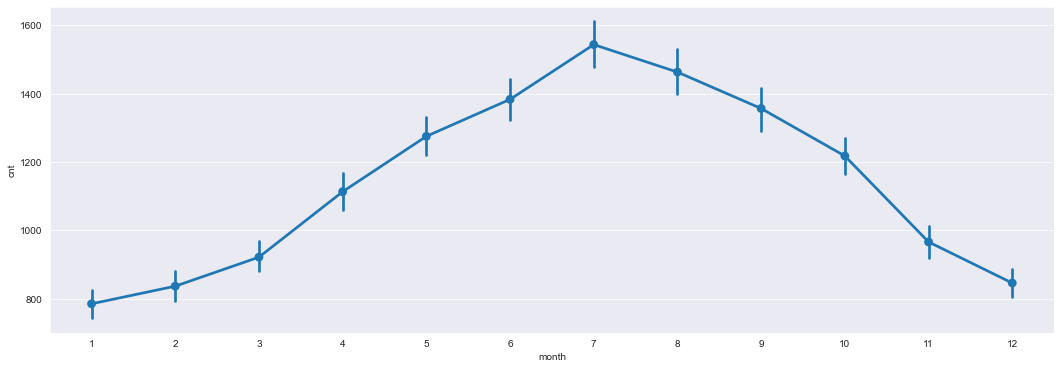

In [104]:
# with pointplot
plt.figure(figsize=(18,6))
sns.pointplot(x="month", y="cnt", data=df);

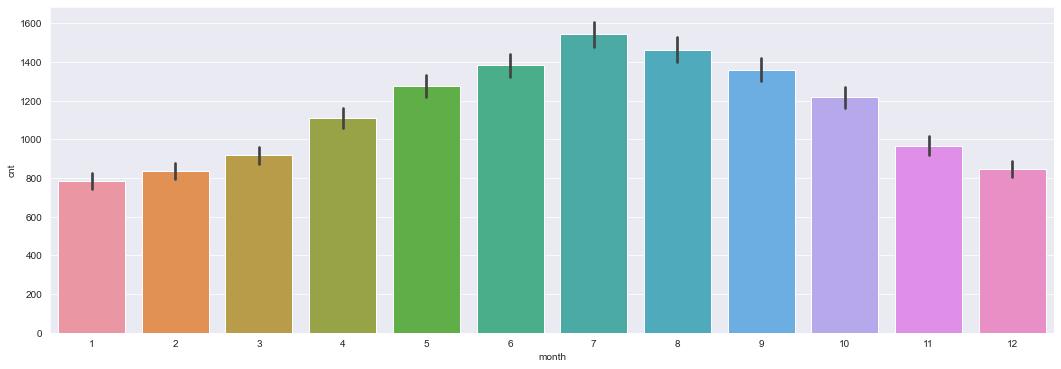

In [105]:
# with barplot
plt.figure(figsize=(18,6))
sns.barplot(x="month", y="cnt", data=df); # güven aralığı default değeri 95. Müdehale etmedim.

### 11.Plot bike shares by hours on (holidays, weekend, season)

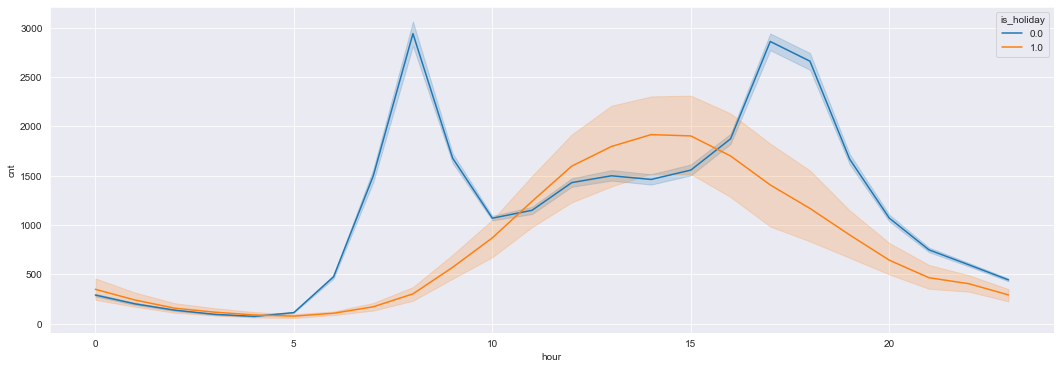

In [106]:
# with lineplot (*whether it is a holiday or not*)
plt.figure(figsize=(18,6))
sns.lineplot(x="hour", y="cnt", data=df, hue="is_holiday");

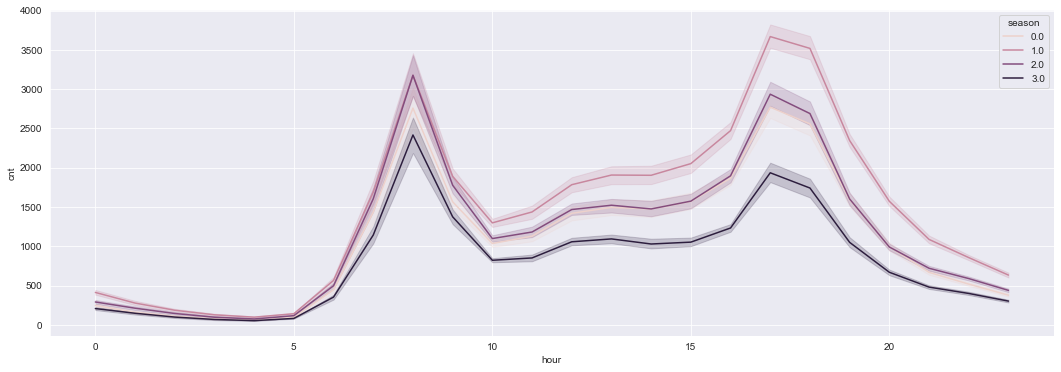

In [107]:
# with lineplot (*You may want to see seasonal breakdowns*)
plt.figure(figsize=(18,6))
sns.lineplot(x="hour", y="cnt", data=df, hue="season");

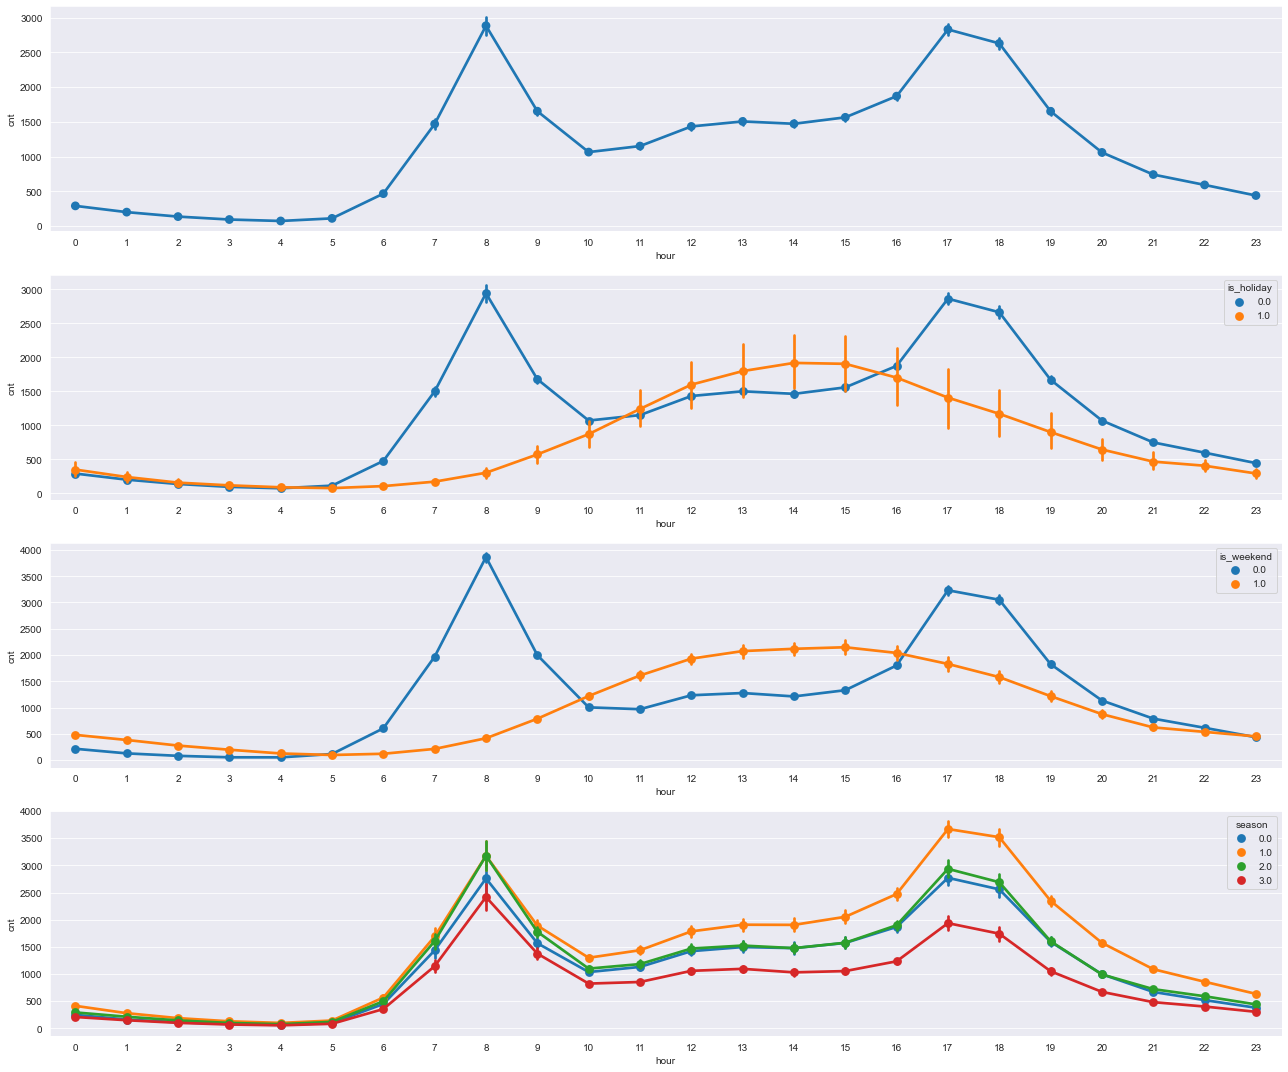

In [108]:
# with pointplot
fig, ax = plt.subplots(4,1, figsize=(18,15))

sns.pointplot(data=df, x="hour", y="cnt", ax=ax[0])
sns.pointplot(data=df, x="hour", y="cnt", ax=ax[1], hue="is_holiday")
sns.pointplot(data=df, x="hour", y="cnt", ax=ax[2], hue="is_weekend")
sns.pointplot(data=df, x="hour", y="cnt", ax=ax[3], hue="season")
plt.tight_layout() ;

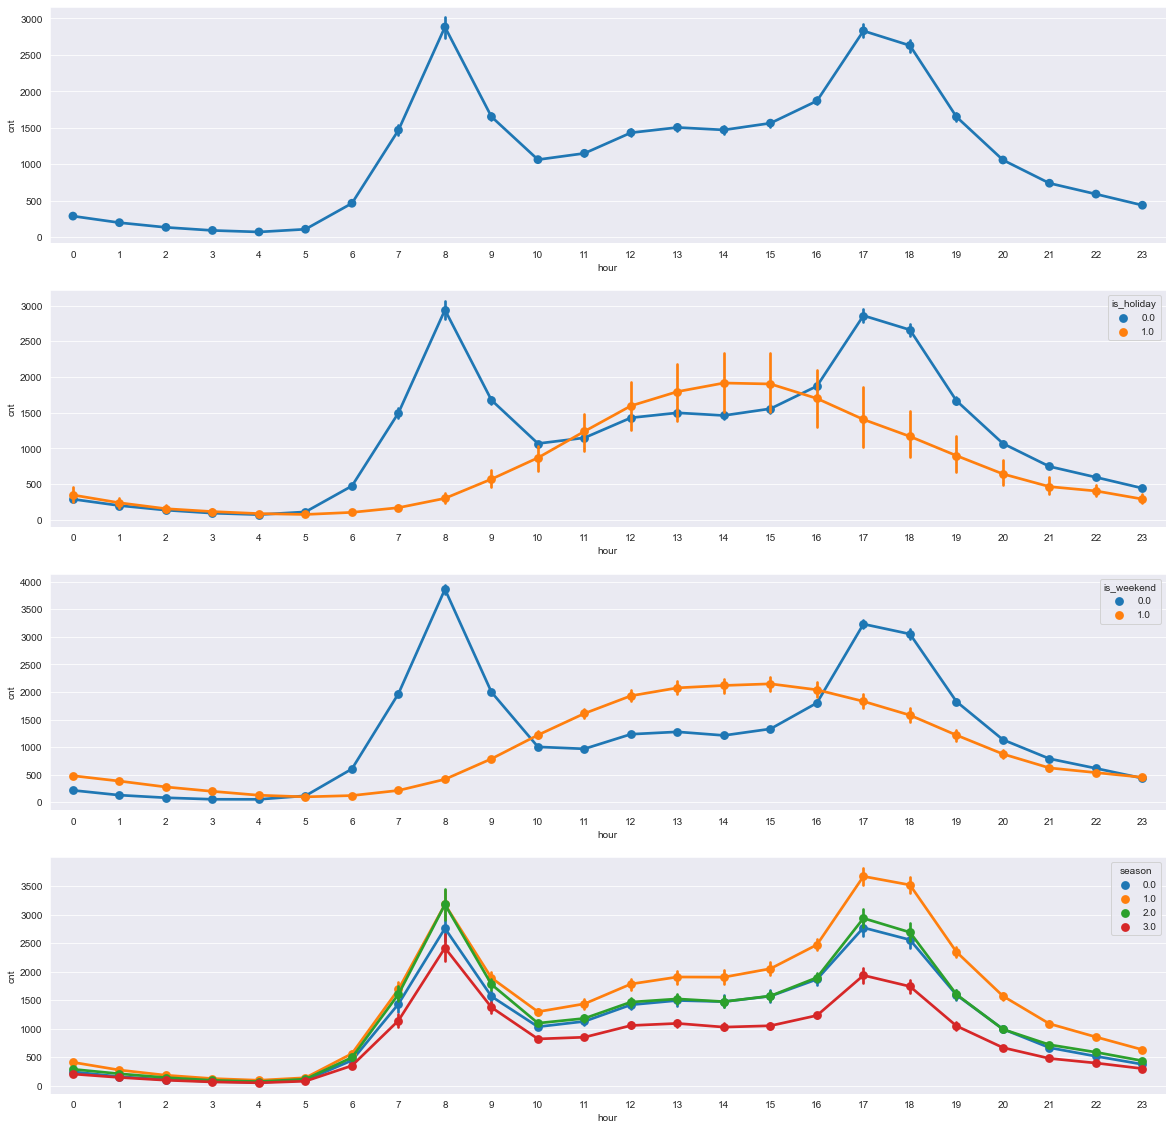

In [109]:
# alternative solution
plt.figure(figsize=(20,20))
plt.subplot(4,1,1)
sns.pointplot(df.hour, df.cnt);
plt.subplot(4,1,2)
sns.pointplot(df.hour, df.cnt, hue = df.is_holiday);
plt.subplot(4,1,3)
sns.pointplot(df.hour, df.cnt, hue = df.is_weekend);
plt.subplot(4,1,4)
sns.pointplot(df.hour, df.cnt, hue = df.season);

### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

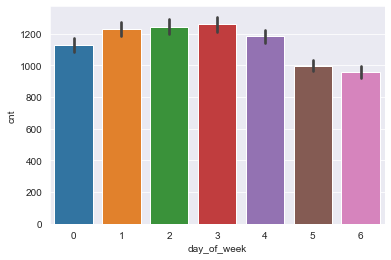

In [110]:
# with barplot
sns.barplot(x="day_of_week", y="cnt", data=df);

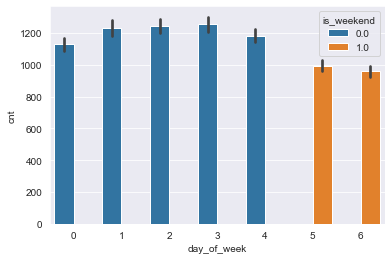

In [111]:
sns.barplot(x="day_of_week", y="cnt", data=df, hue = "is_weekend");

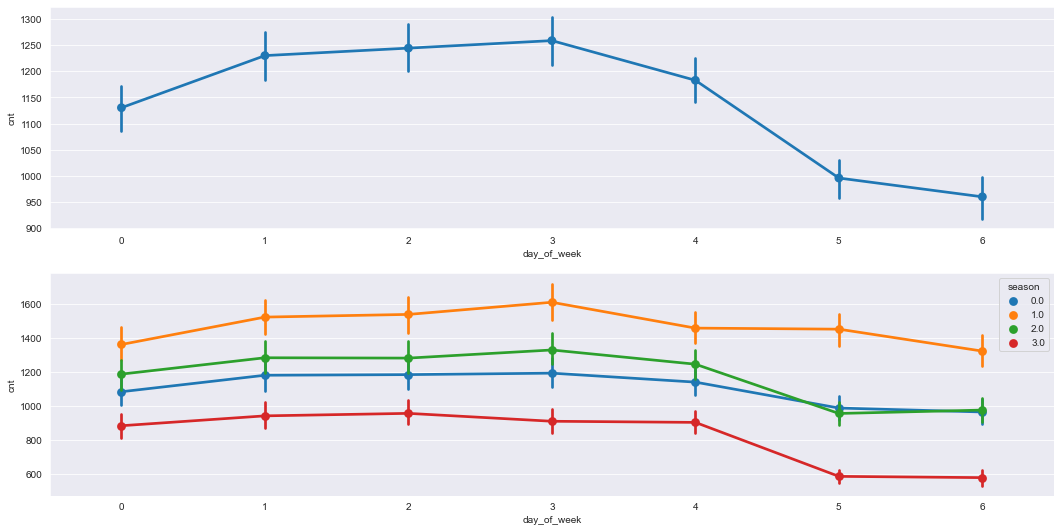

In [112]:
# with pointplot
fig , ax = plt.subplots(2,1, figsize=(18,9))

sns.pointplot(data=df, x="day_of_week", y="cnt", ax=ax[0])
sns.pointplot(data=df, x="day_of_week", y="cnt", ax=ax[1], hue="season");


### 13.Plot bike shares by day of month

In [113]:
# önce day_of_month a göre gruplayacağım. sonra cnt'sinin ortalamasını alacağım

df.groupby("day_of_month").cnt.mean()

day_of_month
1     1077.455652
2     1088.117754
3     1127.602837
4     1144.492174
5     1140.772727
6     1211.227431
7     1194.151832
8     1222.696491
9     1261.260870
10    1157.453913
11    1203.618467
12    1166.952212
13    1139.221441
14    1123.670139
15    1175.629565
16    1140.871080
17    1182.311847
18    1178.552632
19    1153.147826
20    1115.667832
21    1125.729167
22    1127.717014
23    1173.994792
24    1054.147950
25    1190.786087
26    1081.516637
27    1130.681979
28    1062.750871
29    1079.680581
30    1156.406844
31     968.187311
Name: cnt, dtype: float64

In [114]:
pd.DataFrame(df.groupby("day_of_month").cnt.mean().astype("int")).T

day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1127,1144,1140,1211,1194,1222,1261,1157,...,1127,1173,1054,1190,1081,1130,1062,1079,1156,968


day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1127,1144,1140,1211,1194,1222,1261,1157,...,1127,1173,1054,1190,1081,1130,1062,1079,1156,968


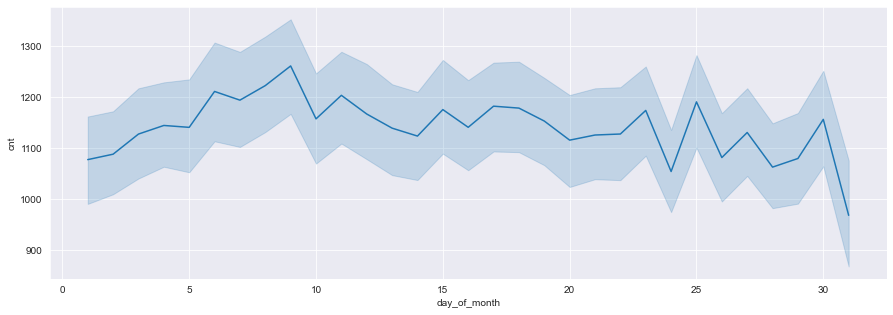

In [115]:
#with lineplot
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x="day_of_month", y="cnt")

pd.DataFrame(df.groupby("day_of_month").cnt.mean().astype("int")).T


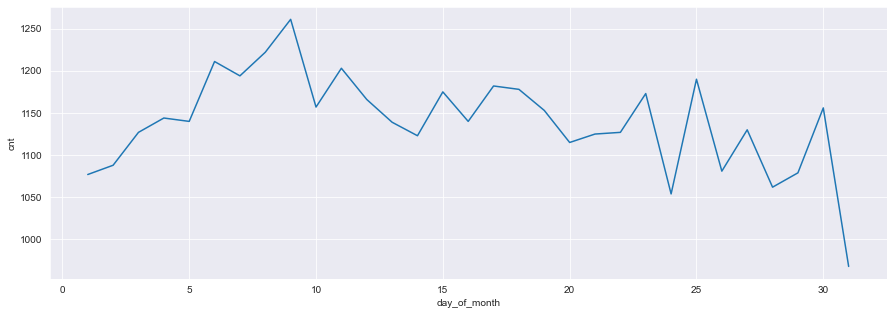

In [116]:
#with lineplot
df_cnt = pd.DataFrame(df.groupby("day_of_month").cnt.mean().astype("int"))

plt.figure(figsize=(15, 5))
sns.lineplot(data=df_cnt, x="day_of_month", y="cnt");

### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

In [117]:
len(df)

17414

In [118]:
# len(df) ==> 17414  -- elimizde 17414 adet kayıt var. her bir kayıt 1 saati ifade ediyor
# 17414 / 24 == 725  -- dolayısıyla elimizde 725 günlük veri olduğunu söyleyebiliriz

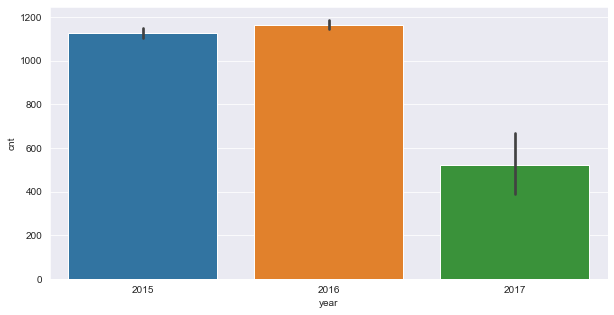

In [119]:
# with barplot
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="year", y="cnt");

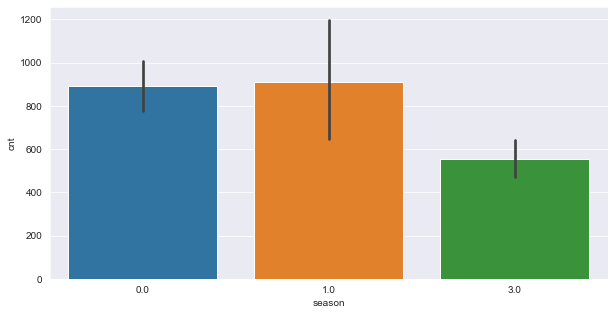

In [120]:
# with barplot

# benden tatil günlerinin verileri içerisinde mevsimlere göre cnt sayılarının grafiğini istiyor.
# önce tatil günlerinin True olduğu durumları dataframe'den çekerim ve çizdireceğim barplotta bu datayı kullanırım.

plt.figure(figsize=(10, 5))
sns.barplot(data=df[df["is_holiday"]==1], x="season", y="cnt");

# bahar aylarında hiç resmi tatil olmadığını 2.0 nci sezon olmamasından anlarız

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [121]:
df.is_weekend.value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

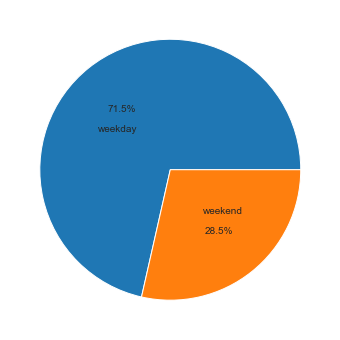

In [122]:
# pie chart

fig, ax = plt.subplots(figsize=(8,6))

ax.pie(df.is_weekend.value_counts(),
      labels=["weekday", "weekend"],
       labeldistance=0.4,
       autopct="%.1f%%");

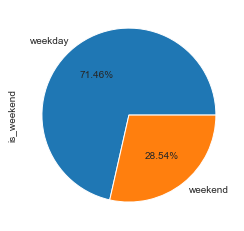

In [123]:
# alternative solution
labels = ["weekday","weekend"]
df.is_weekend.value_counts().plot(kind = 'pie',labels= labels,autopct='%1.2f%%');

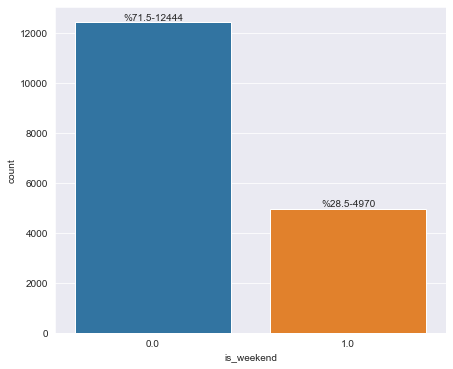

In [124]:
# with countplot
bölüm = df.is_weekend.value_counts().sum()/100
plt.figure(figsize=(7,6))
sns.countplot(data = df, x = "is_weekend");
for index,value in enumerate(df.is_weekend.value_counts()):
    plt.text(index, value, f"%{value/bölüm:.3}-{value}", ha="center", va="bottom")


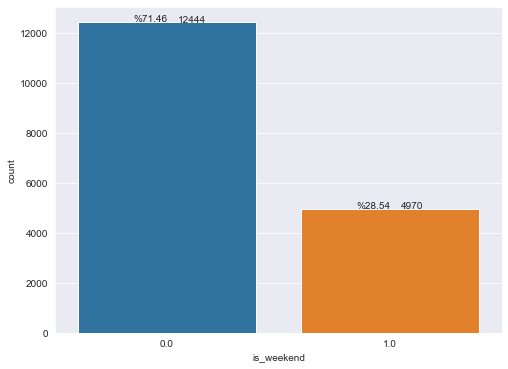

In [125]:
# Alternative solution
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data=df,x="is_weekend",ax=ax)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.45, p.get_height()+1))
    ax.annotate("%"+str(round((p.get_height()/(df.is_weekend.count()))*100,2)), (p.get_x()+0.25, p.get_height()+10));

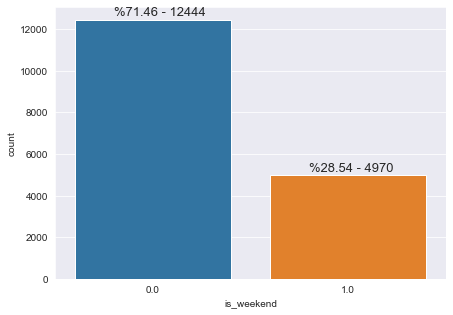

In [126]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(x = "is_weekend", data = df)
for p in ax.patches:
    ax.annotate('%' + str(round(100 * (p.get_height()) / df.is_weekend.value_counts().sum(), 3)) + " " + "-" + " " +
                str(p.get_height()), (p.get_x()+0.20, p.get_height()+200), fontsize = 13)
plt.show()

### 16.Plot the distribution of weather code by seasons

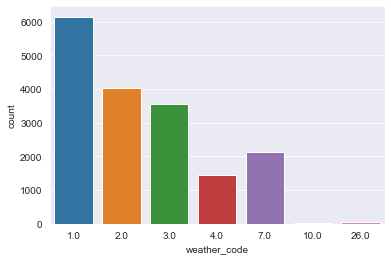

In [127]:
# with countplot
sns.countplot(x="weather_code", data=df);

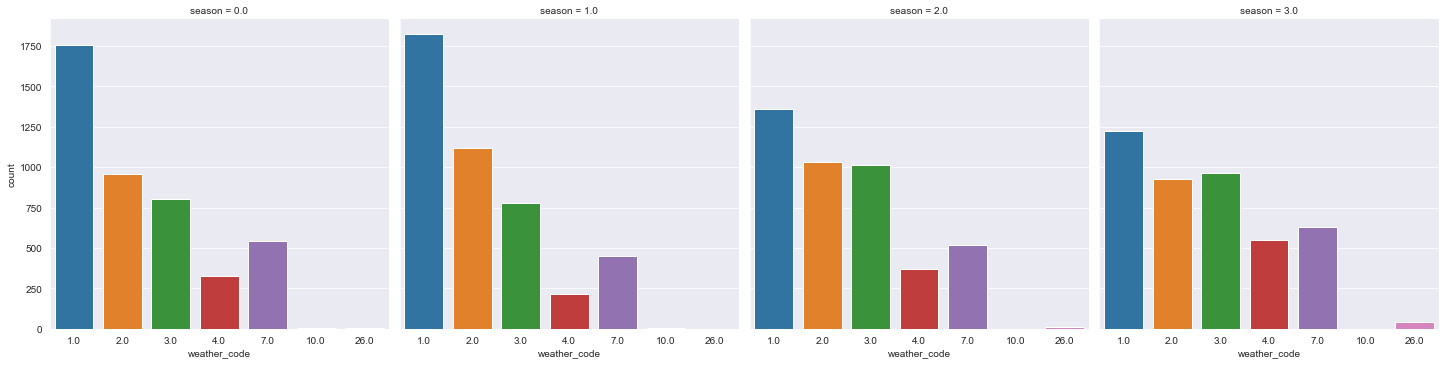

In [128]:
# with catplot
sns.catplot(x="weather_code", data=df, col="season", kind="count");

### 17.Visulaize all the continuous variables with histogram and scatterplot

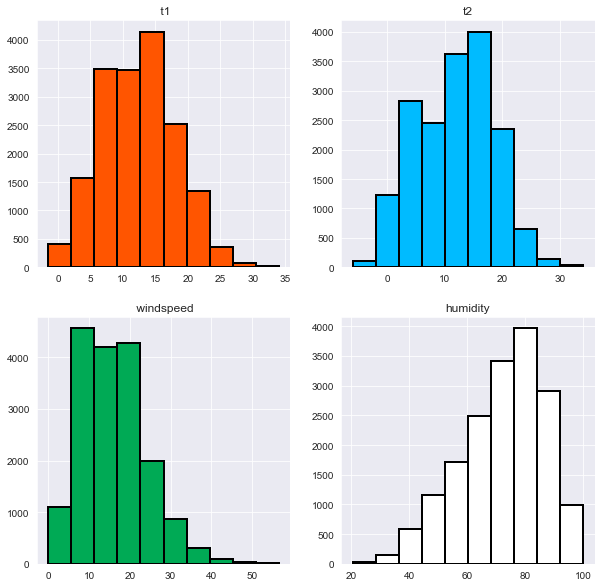

In [129]:
# matplotlib hist

fig,axes=plt.subplots(2,2, figsize=(10,10))


axes[0,0].hist(x="t1",data=df,edgecolor="black",linewidth=2,color='#ff5500')
axes[0,0].set_title(" t1")

axes[0,1].hist(x="t2",data=df,edgecolor="black",linewidth=2,color='#00bbff')
axes[0,1].set_title("t2")

axes[1,0].hist(x="wind_speed",data=df,edgecolor="black",linewidth=2,color='#00aa55')
axes[1,0].set_title(" windspeed")

axes[1,1].hist(x="hum",data=df,edgecolor="black",linewidth=2,color='#ffffff')
axes[1,1].set_title("humidity");


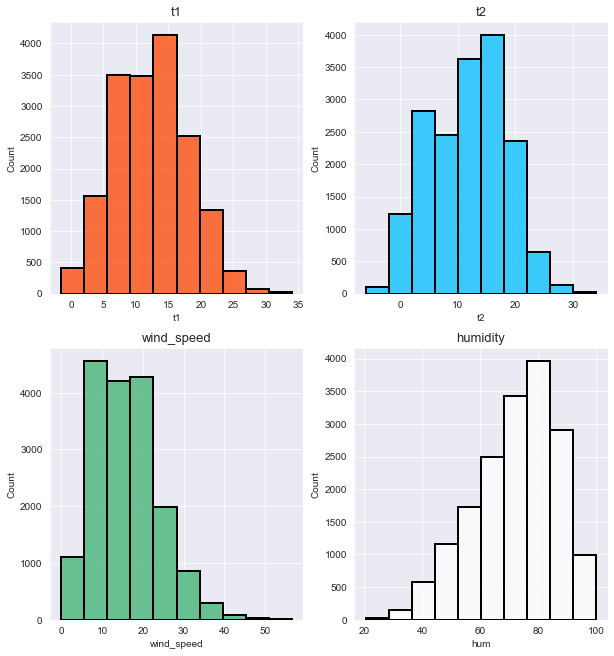

In [130]:
#seaborn hist

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (10,11))
sns.histplot(data=df, x ="t1", ax = ax[0][0], bins = 10, stat = "count", color = "orangered", edgecolor = "black", linewidth = 2).set_title("t1", fontsize = 13)
sns.histplot(data=df, x ="t2", ax = ax[0][1], bins = 10, stat = "count", color = "deepskyblue", edgecolor = "black", linewidth = 2).set_title("t2", fontsize = 13)
sns.histplot(data=df, x ="wind_speed", ax = ax[1][0], bins = 10, stat = "count", color = "mediumseagreen", edgecolor = "black", linewidth = 2).set_title("wind_speed", fontsize = 13)
sns.histplot(data=df, x ="hum", ax = ax[1][1], bins = 10, stat = "count",  color = "white", edgecolor = "black", linewidth = 2).set_title("humidity", fontsize = 13)
plt.show()

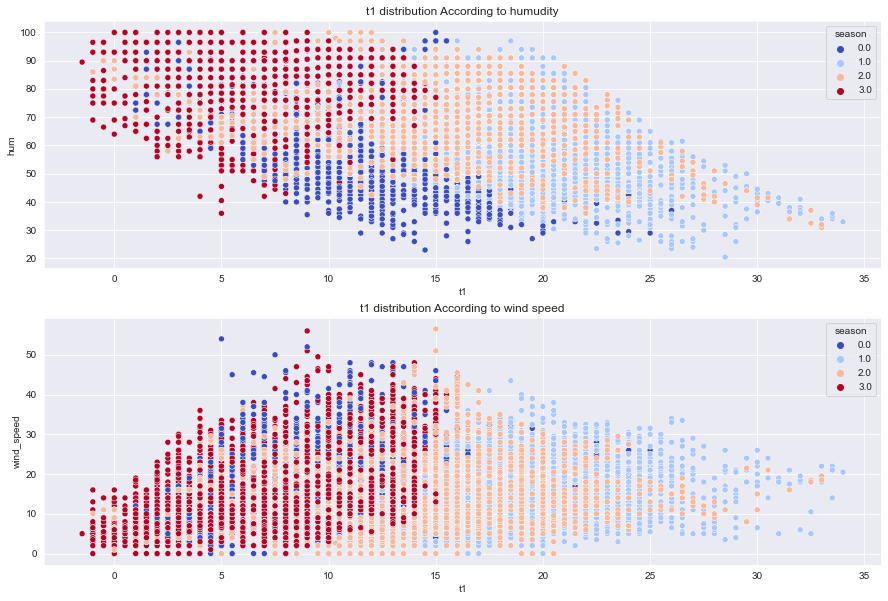

In [131]:
plt.figure(figsize=(15,10))

plt.subplot(211)
plt.title("t1 distribution According to humudity")

sns.scatterplot(x="t1",y="hum",data=df, hue='season', palette="coolwarm")

plt.subplot(212)
plt.title("t1 distribution According to wind speed")
sns.scatterplot(x="t1",y="wind_speed",data=df, hue='season',palette="coolwarm");

In [132]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour,year-month
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,6,0,2015-01
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,6,1,2015-01
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,2,2015-01
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,3,2015-01
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,6,4,2015-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,3,1,19,2017-01
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,3,1,20,2017-01
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,3,1,21,2017-01


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___